# 数据加载

In [1]:
import numpy as np
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
train_we = np.load('../Semantics/data/train_we_(32193, 120).npy')
test_we = np.load('../Semantics/data/test_we_(1613, 120).npy')
we_emb_matrix = np.load('../Semantics/data/we_embedding_matrix_(6000, 300).npy')

y_train = np.load('../dataset/data/train_label_(32193, 2).npy')
y_test = np.load('../dataset/data/test_label_(1613, 2).npy')

train_we.shape, test_we.shape, y_train.shape, y_test.shape

((32193, 120), (1613, 120), (32193, 2), (1613, 2))

# BiGRU

In [4]:
from TextModels import BiGRU
from train import train

model = BiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix).model
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 120, 64)      63936       embedding_2[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_2 (Glo (None, 64)           0           bidirectional_2[0][0]            
__________________________________________________________________________________________________
global_max

Train on 32193 samples, validate on 1613 samples
Epoch 1/100
32193/32193 [==============================] - 33s 1ms/step - loss: 0.5006 - acc: 0.8848 - val_loss: 0.7455 - val_acc: 0.6851
Epoch 2/100
32193/32193 [==============================] - 30s 919us/step - loss: 0.1994 - acc: 0.9535 - val_loss: 0.6789 - val_acc: 0.7142
Epoch 3/100
32193/32193 [==============================] - 29s 907us/step - loss: 0.1404 - acc: 0.9672 - val_loss: 0.6813 - val_acc: 0.7285
Epoch 4/100
32193/32193 [==============================] - 29s 906us/step - loss: 0.1129 - acc: 0.9756 - val_loss: 0.8573 - val_acc: 0.6956
Epoch 5/100
32193/32193 [==============================] - 29s 895us/step - loss: 0.0957 - acc: 0.9806 - val_loss: 0.7097 - val_acc: 0.7402
Epoch 6/100
32193/32193 [==============================] - 29s 903us/step - loss: 0.0817 - acc: 0.9856 - val_loss: 0.8559 - val_acc: 0.7210
Epoch 7/100
32193/32193 [==============================] - 29s 902us/step - loss: 0.0710 - acc: 0.9879 - val_loss

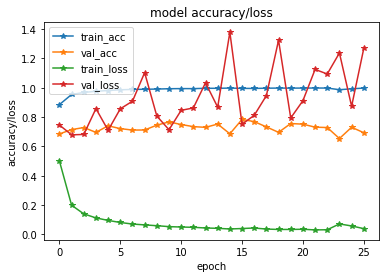

ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

In [6]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

# 2.修改model
model = BiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix).model

# 3.修改model_name、超参数
train(model, model_name='BiGRU', 
      train_data=X_train, test_data=X_test,
      train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

In [4]:
from train import predict

predict(model, model_file='./model/BiGRU.hdf5', test_data=test_we, test_label=y_test)



TEST_sz: 1613

Accuracy: 0.7836329820210788

              precision    recall  f1-score   support

       truth      0.742     0.934     0.827       891
       rumor      0.880     0.598     0.712       722

   micro avg      0.784     0.784     0.784      1613
   macro avg      0.811     0.766     0.769      1613
weighted avg      0.803     0.784     0.775      1613
 samples avg      0.784     0.784     0.784      1613




array([[0.96468985, 0.03531018],
       [0.9985771 , 0.00142282],
       [0.995261  , 0.00473902],
       ...,
       [0.21726112, 0.78273886],
       [0.3283201 , 0.6716799 ],
       [0.08903226, 0.9109677 ]], dtype=float32)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_4 (Bidirectional) (None, 120, 64)      63936       embedding_4[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_4 (Glo (None, 64)           0           bidirectional_4[0][0]            
__________________________________________________________________________________________________
global_max

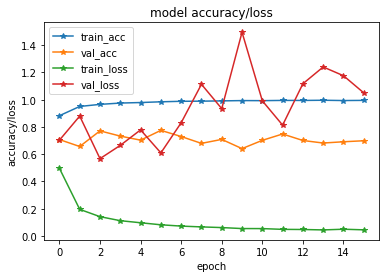


TEST_sz: 1613

Accuracy: 0.7749535027898327

              precision    recall  f1-score   support

       truth      0.767     0.852     0.807       891
       rumor      0.788     0.680     0.730       722

   micro avg      0.775     0.775     0.775      1613
   macro avg      0.777     0.766     0.769      1613
weighted avg      0.776     0.775     0.773      1613
 samples avg      0.775     0.775     0.775      1613




In [6]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

# 2.修改model
model = BiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix).model

# 3.修改model_name、超参数
train(model, model_name='BiGRU2', 
      train_data=X_train, test_data=X_test,
      train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 120, 64)      63936       embedding_2[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_2 (Glo (None, 64)           0           bidirectional_2[0][0]            
__________________________________________________________________________________________________
global_max

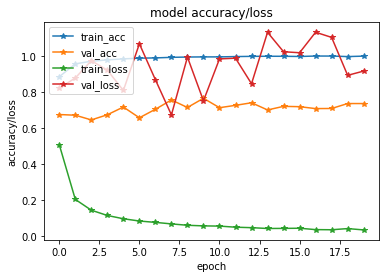


TEST_sz: 1613

Accuracy: 0.7644141351518909

              precision    recall  f1-score   support

       truth      0.732     0.906     0.809       891
       rumor      0.835     0.590     0.692       722

   micro avg      0.764     0.764     0.764      1613
   macro avg      0.783     0.748     0.750      1613
weighted avg      0.778     0.764     0.757      1613
 samples avg      0.764     0.764     0.764      1613




In [4]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

# 2.修改model
model = BiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix).model

# 3.修改model_name、超参数
train(model, model_name='BiGRU3', 
      train_data=X_train, test_data=X_test,
      train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

In [5]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

# 2.修改model
model = BiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix).model

# 3.修改model_name、超参数
train(model, model_name='BiGRU4', 
      train_data=X_train, test_data=X_test,
      train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 120, 64)      63936       embedding_3[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_3 (Glo (None, 64)           0           bidirectional_3[0][0]            
__________________________________________________________________________________________________
global_max

KeyboardInterrupt: 

# TextCNN

In [5]:
from TextModels import TextCNN
from train import train

model = TextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix, filters_num=256).model
model.summary()


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 118, 256)     230656      embedding_3[0][0]                
__________________________________________________________________________________________________
conv1d_2 (Conv1D)  

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 118, 256)     230656      embedding_2[0][0]                
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 117, 256)     307456      embedding_2[0][0]                
__________________________________________________________________________________________________
conv1d_6 (

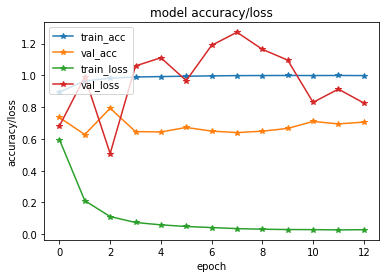


TEST_sz: 1613

Accuracy: 0.7929324240545568

              precision    recall  f1-score   support

       truth      0.792     0.847     0.819       891
       rumor      0.794     0.726     0.758       722

   micro avg      0.793     0.793     0.793      1613
   macro avg      0.793     0.787     0.789      1613
weighted avg      0.793     0.793     0.792      1613
 samples avg      0.793     0.793     0.793      1613




In [4]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

# 2.修改model
model = TextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix, filters_num=256).model

# 3.修改model_name、超参数
train(model, model_name='TextCNN', 
      train_data=X_train, test_data=X_test,
      train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_9 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_25 (Conv1D)              (None, 118, 256)     230656      embedding_9[0][0]                
__________________________________________________________________________________________________
conv1d_26 (Conv1D)              (None, 117, 256)     307456      embedding_9[0][0]                
__________________________________________________________________________________________________
conv1d_27 

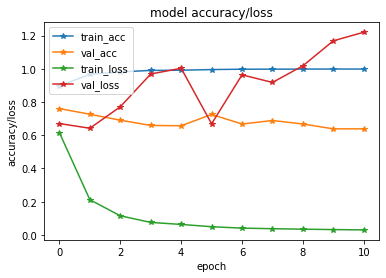


TEST_sz: 1613

Accuracy: 0.7606943583384997

              precision    recall  f1-score   support

       truth      0.738     0.878     0.802       891
       rumor      0.803     0.616     0.697       722

   micro avg      0.761     0.761     0.761      1613
   macro avg      0.771     0.747     0.750      1613
weighted avg      0.767     0.761     0.755      1613
 samples avg      0.761     0.761     0.761      1613




In [11]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

# 2.修改model
model = TextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix, filters_num=256).model

# 3.修改model_name、超参数
train(model, model_name='TextCNN2', 
      train_data=X_train, test_data=X_test,
      train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_10 (Embedding)        (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_28 (Conv1D)              (None, 118, 256)     230656      embedding_10[0][0]               
__________________________________________________________________________________________________
conv1d_29 (Conv1D)              (None, 117, 256)     307456      embedding_10[0][0]               
__________________________________________________________________________________________________
conv1d_30 

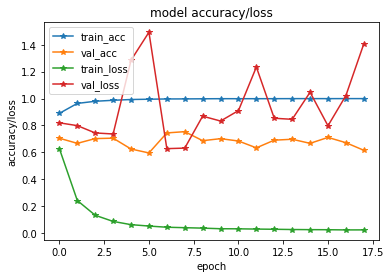


TEST_sz: 1613

Accuracy: 0.7538747675139492

              precision    recall  f1-score   support

       truth      0.714     0.925     0.806       891
       rumor      0.854     0.543     0.664       722

   micro avg      0.754     0.754     0.754      1613
   macro avg      0.784     0.734     0.735      1613
weighted avg      0.777     0.754     0.742      1613
 samples avg      0.754     0.754     0.754      1613




In [12]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

# 2.修改model
model = TextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix, filters_num=256).model

# 3.修改model_name、超参数
train(model, model_name='TextCNN3', 
      train_data=X_train, test_data=X_test,
      train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_22 (Conv1D)              (None, 118, 256)     230656      embedding_8[0][0]                
__________________________________________________________________________________________________
conv1d_23 (Conv1D)              (None, 117, 256)     307456      embedding_8[0][0]                
__________________________________________________________________________________________________
conv1d_24 

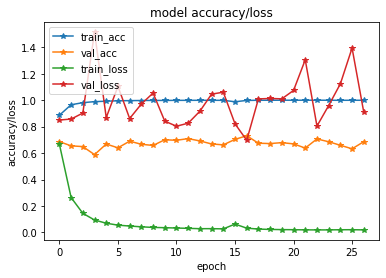


TEST_sz: 1613

Accuracy: 0.7309361438313701

              precision    recall  f1-score   support

       truth      0.692     0.926     0.792       891
       rumor      0.843     0.490     0.620       722

   micro avg      0.731     0.731     0.731      1613
   macro avg      0.767     0.708     0.706      1613
weighted avg      0.759     0.731     0.715      1613
 samples avg      0.731     0.731     0.731      1613




In [10]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

# 2.修改model
model = TextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix, filters_num=256).model

# 3.修改model_name、超参数
train(model, model_name='TextCNN4', 
      train_data=X_train, test_data=X_test,
      train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 118, 256)     230656      embedding_4[0][0]                
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 117, 256)     307456      embedding_4[0][0]                
__________________________________________________________________________________________________
conv1d_6 (

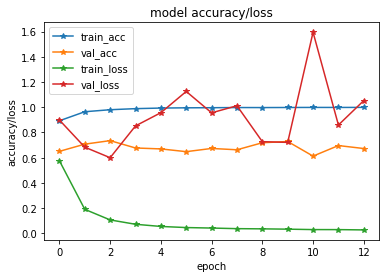


TEST_sz: 1613

Accuracy: 0.7352758834469931

              precision    recall  f1-score   support

       truth      0.703     0.902     0.790       891
       rumor      0.814     0.529     0.641       722

   micro avg      0.735     0.735     0.735      1613
   macro avg      0.759     0.716     0.716      1613
weighted avg      0.753     0.735     0.724      1613
 samples avg      0.735     0.735     0.735      1613




In [6]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

# 2.修改model
model = TextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix, filters_num=256).model

# 3.修改model_name、超参数
train(model, model_name='TextCNN5', 
      train_data=X_train, test_data=X_test,
      train_label=y_train, test_label=y_test, epochs=100, batch_size=128)